<div style="background-color:#000047; padding: 30px; border-radius: 10px; color: white; text-align: center;">
    <img src='Figures/alinco.png' style="height: 100px; margin-bottom: 10px;"/>
    <h1>Regresion Lineal, Multiple y Polinomial</h1>
</div>


## Regresión Lineal
Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import random

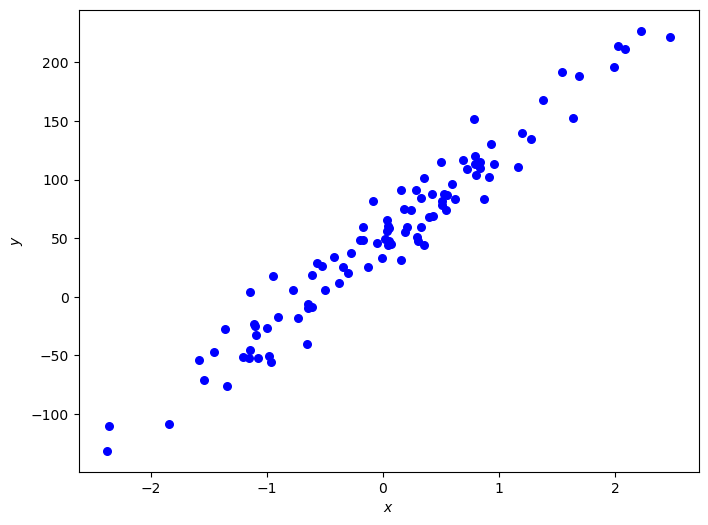

In [2]:
from sklearn import datasets
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4, bias=50)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y, color='b', marker='o', s=30)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### ¿Cómo ajustamos una curva a esto?

Consideramos entonces ajustes de la forma 

$$\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$$ (lineas rectas).


Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

> El objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

> El objetivo es encontrar los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza El error cuadrático medio (MSE):
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ 

## Gradiente Descendente

Partiendo del **MSE**:

$$ J(\beta) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}(x_i) - y_i)^2$$  

$\beta = [\beta_0, \beta_1]$


El algoritmo de gradiente descendente es un método de optimización local en el que, en cada paso, empleamos el gradiente negativo como dirección de descenso. 

$$\boldsymbol{\beta}_{k} = \boldsymbol{\beta}_{k-1}-\alpha \nabla J(\boldsymbol{\beta}_{k-1})$$

Para una regresión lineal tendríamos que las ecuaciones del algoritmo de gradiente descendente son:


$$ \nabla J(\boldsymbol{\beta}) = \left[\begin{array}{c} \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i) \\ 
\frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i\end{array}\right].$$


$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$

<img alt="Datos categóricos con Python" title="GradientDescendt" src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." high=300px, width=300px>



## Linear Regression Class

In [3]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.mse_hist= None
    
    def fit(self, X, y):
        self.mse_hist = []
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features,1)/np.sqrt(n_samples)
        self.bias = 0
        
        #Algoritmo de gradiente descendente
        for k in range(self.n_iters):
            y_pred = np.dot(X,self.weights) + self.bias # yhat = X*beta
            dw = (1/n_samples)*np.dot(X.T, (y_pred - y)) #derivada parcial de betas (beta1,beta2,..,betan)
            db = (1/n_samples)*np.sum(y_pred - y) #derivada parcial del bias (beta_0)
            
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
            
            self.mse_hist.append(self.mse(X,y))
            
    def mse(self,X,y):
        return np.mean((y-self.predict(X))**2)
    
    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias # yhat = X*beta
        return y_pred
    
    def get_coef(self):
        return self.weights
    
    def get_bias(self):
        return self.bias
    
    def get_mse_hist(self):
        return self.mse_hist

In [4]:
X.shape, y.shape

((100, 1), (100,))

## Train-Test-Split

In [5]:
import random

In [6]:
def train_test_split(X_df, y_df, test_size):
    if isinstance(test_size, float):
        test_size=round(test_size*len(X_df))
    
    ind = X_df.index.to_list()
    test_indices = random.sample(population=ind, k = test_size)
    
    X_test_df = X_df.loc[test_indices]
    X_train_df = X_df.drop(test_indices)
    
    y_test_df = y_df.loc[test_indices]
    y_train_df = y_df.drop(test_indices)
    
    return X_train_df, X_test_df, y_train_df, y_test_df


In [7]:
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X), pd.DataFrame(y), 0.2)

In [8]:
X_train.shape, y_train.shape

((80, 1), (80, 1))

In [9]:
X_test.shape, y_test.shape

((20, 1), (20, 1))

In [10]:
#Entrenar un modelo de regresion Lineal utilizando nuestra librería
modelo_reg = LinearRegression()


In [11]:
#Entrenar el modelo
modelo_reg.fit(X_train.values, y_train.values)

In [12]:
modelo_reg.get_coef() #Beta1

array([[75.41262193]])

In [13]:
modelo_reg.get_bias() #beta0

49.23955926630162

$$ \hat{y}(x) = 49.036 + 74.58*x$$

In [14]:
y_pred_train = modelo_reg.predict(X_train.values)


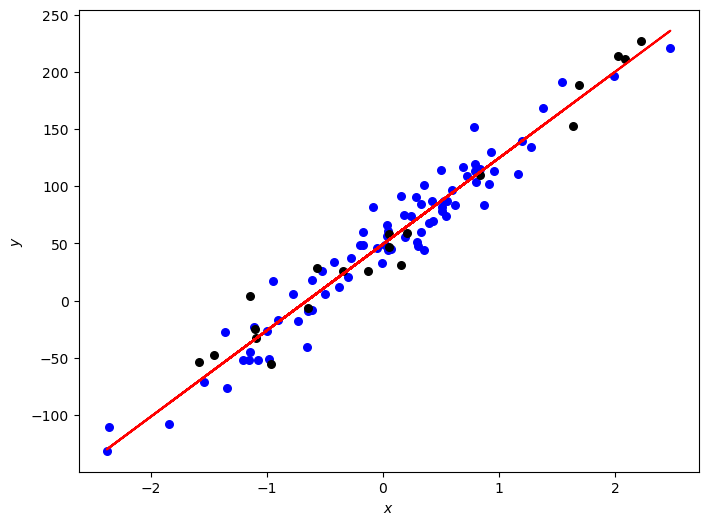

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.values[:,0], y_train.values, color = 'b', marker='o', s=30)
plt.scatter(X_test.values[:,0], y_test.values, color = 'k', marker='o', s=30)
plt.plot(X_train.values[:,0],y_pred_train, color = 'r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [16]:
modelo_reg.get_mse_hist()

[7362.872685926879,
 7236.744885322657,
 7112.89187287165,
 6991.272160388724,
 6871.845024577582,
 6754.570492784231,
 6639.409329018346,
 6526.323020237426,
 6415.273762888743,
 6306.224449704237,
 6199.138656743515,
 6093.980630680299,
 5990.715276327672,
 5889.308144397604,
 5789.72541949035,
 5691.933908309316,
 5595.901028097163,
 5501.5947952889455,
 5408.983814378165,
 5318.037266991729,
 5228.72490116984,
 5141.017020846957,
 5054.884475529997,
 4970.2986501700825,
 4887.231455224134,
 4805.655316902748,
 4725.54316760082,
 4646.868436507463,
 4569.605040391833,
 4493.727374561536,
 4419.210303990347,
 4346.029154612061,
 4274.159704777313,
 4203.57817687031,
 4134.2612290824345,
 4066.1859473397826,
 3999.329837381699,
 3933.6708169874864,
 3869.187208348479,
 3805.8577305827357,
 3743.661492389667,
 3682.5779848419493,
 3622.5870743121536,
 3563.6689955315187,
 3505.804344778404,
 3448.9740731939673,
 3393.1594802226623,
 3338.3422071752166,
 3284.5042309117716,
 3231.627857

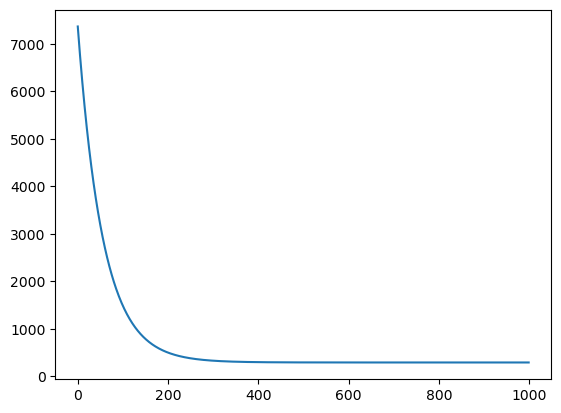

In [17]:
plt.plot(modelo_reg.get_mse_hist());

### Ejemplo 1:

In [20]:
# Cargar de la Librería LinearRegression
from HyAIA import LinearRegression as LR

In [21]:
datos = pd.read_csv('Data/Position_Salaries.csv')
datos.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [22]:
X = datos[['Level']]
y = datos[['Salary']]

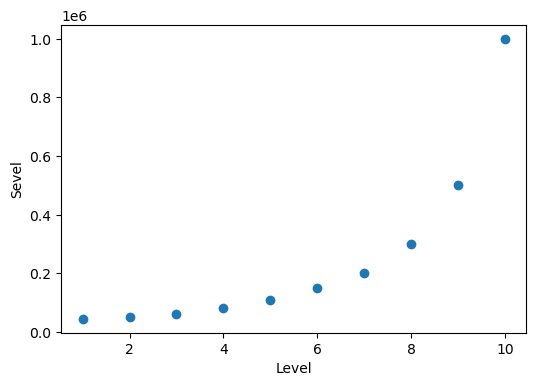

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(X.values, y.values)
plt.xlabel('Level')
plt.ylabel('Sevel')
plt.show()

In [24]:
# Aplicar un Modelo de regresión Lineal

#1.- Instanciar un Objeto de la clase LR
reg_model = LR(lr=0.001, n_iters=2000)


In [25]:
#Entrenamiento del modeloreg_model = LinearRegression()
reg_model.fit(X.values, y.values)

In [26]:
reg_model.get_coef(), reg_model.get_bias()

(array([[61741.86844816]]), -62105.499566814804)

In [27]:
#2.- Predecir los valores de x
ypred = reg_model.predict(X.values)
ypred

array([[-3.63631119e+02],
       [ 6.13782373e+04],
       [ 1.23120106e+05],
       [ 1.84861974e+05],
       [ 2.46603843e+05],
       [ 3.08345711e+05],
       [ 3.70087580e+05],
       [ 4.31829448e+05],
       [ 4.93571316e+05],
       [ 5.55313185e+05]])

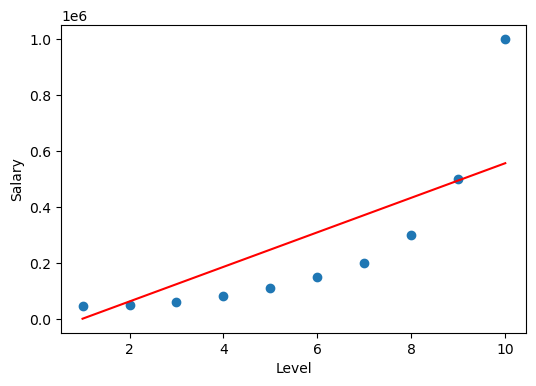

In [28]:
#3.- Graficar el modelo con los datos
plt.figure(figsize=(6,4))
plt.scatter(X.values, y.values)
plt.plot(X.values, ypred, 'r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()


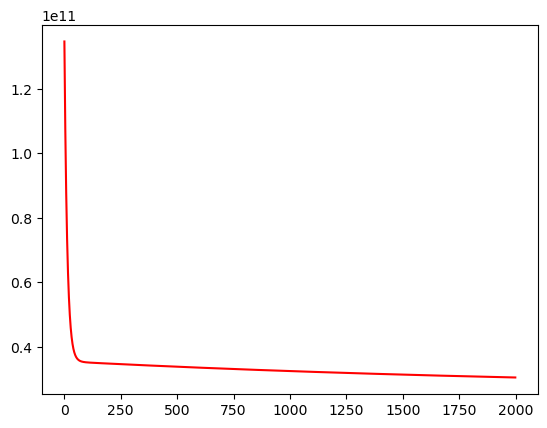

In [29]:
#4.- Evaluar el modelo : 
plt.plot(reg_model.get_mse_hist(), 'r');



## Regression Polinomial 

Ahora, la ecuación para la Regresión Polinomial será la siguiente:

$$y =  \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n$$


In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly = PolynomialFeatures(degree= 2, include_bias=False)

In [32]:
X_poly = poly.fit_transform(X)
X_poly

array([[  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.]])

In [33]:
y.values

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [34]:
#Aplicar el modelo de reg Lineal con grado 2
reg_model2 = LR(n_iters=10000, lr = 0.0001)
#Entrenar el modelo
reg_model2.fit(X_poly, y.values)

In [35]:
reg_model2.get_coef()

array([[-39966.05472966],
       [ 11844.65581855]])

In [36]:
reg_model2.get_bias()

1398.7329349901097

$$ \hat{y}(x) =1398.6  -39965.98*x + 11844.649*x^2$$

In [37]:
#predecir el modelo
ypred_poly2 = reg_model2.predict(X_poly)
ypred_poly2

array([[-26722.66597612],
       [-31154.75325014],
       [-11897.52888705],
       [ 31049.00711313],
       [ 97684.85475041],
       [188010.01402479],
       [302024.48493627],
       [439728.26748485],
       [601121.36167052],
       [786203.7674933 ]])

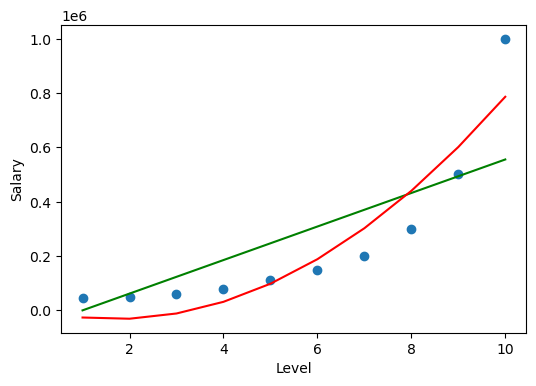

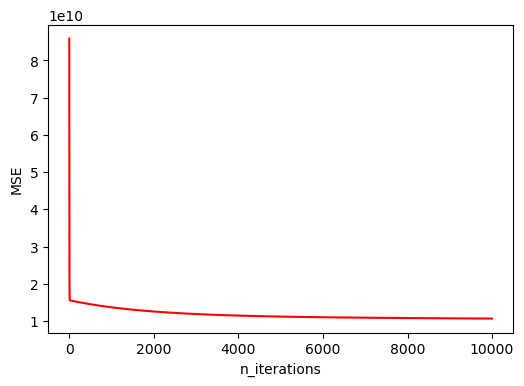

In [38]:
#3.- Graficar el modelo con los datos
plt.figure(figsize=(6,4))
plt.scatter(X.values, y.values)
plt.plot(X.values, ypred, 'g')
plt.plot(X.values, ypred_poly2, 'r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#Obtener historial de la minimización del error

plt.figure(figsize=(6,4))
plt.plot(reg_model2.get_mse_hist(),'r')
plt.xlabel('n_iterations')
plt.ylabel('MSE')
plt.show()

## Regression Multiple 

$$y =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$


In [39]:
house = pd.read_csv('Data/USA_housing.csv')
house.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [43]:
from HyAIA import HyAIA as hy

In [44]:
house = hy(house)

In [45]:
house.get_dqr()

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values
Avg. Area Income,Avg. Area Income,float64,5000,0,5000,107701.748378,17796.63119
Avg. Area House Age,Avg. Area House Age,float64,5000,0,5000,9.519088,2.644304
Avg. Area Number of Rooms,Avg. Area Number of Rooms,float64,5000,0,5000,10.759588,3.236194
Avg. Area Number of Bedrooms,Avg. Area Number of Bedrooms,float64,5000,0,255,6.5,2.0
Area Population,Area Population,float64,5000,0,5000,69621.713378,172.610686
Price,Price,float64,5000,0,5000,2469065.594175,15938.657923
Address,Address,object,5000,0,5000,Unit 9871 Box 9037\nDPO AP 37275-9289,"000 Adkins Crescent\nSouth Teresa, AS 49642-1348"


In [46]:
house.data.drop('Address', axis=1, inplace=True)

In [47]:
house.data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [48]:
# Estandarizar
# xstd = (x - x.mean() )/x.std

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
std = StandardScaler()

In [51]:
X_std = std.fit_transform(house.data.iloc[:,:5])
X_std

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [52]:
X_std.shape

(5000, 5)

In [56]:
y = house.data.iloc[:,5].values
y = y.reshape(len(y),1)
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

In [57]:
X_std.shape, y.shape

((5000, 5), (5000, 1))

In [58]:
#Aplicar el modelo de regresion multinomial (5 variables)
reg_model_house = LR(n_iters = 1000, lr=0.01)
#Entrenamiento
reg_model_house.fit(X_std, y)

In [59]:
house.data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

$$ \hat{y}(x_1,x_2,x_3,x_4,x_5) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3  + \beta_4 x_4 +  \beta_5 x_5$$

In [60]:
reg_model_house.get_coef()

array([[229924.6824593 ],
       [164186.90965581],
       [121045.65757731],
       [  2343.6890769 ],
       [150867.0344923 ]])

In [61]:
reg_model_house.get_bias()

1232019.4640289764

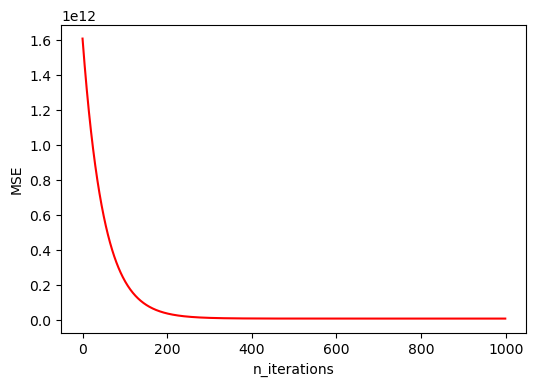

In [62]:
#Obtener el error del modelo
plt.figure(figsize=(6,4))
plt.plot(reg_model_house.get_mse_hist(),'r')
plt.xlabel('n_iterations')
plt.ylabel('MSE')
plt.show()

In [63]:
house.data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [64]:
# Hacer una predicción de una nueva entrada
X_new = np.array([[64856.2, 7, 5, 3, 30000.5]]) #Datos de entrada sin estandarizar
X_new_std = std.transform(X_new)

y_pred_new = reg_model_house.predict(X_new_std)
y_pred_new

C:\Users\uie70742\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[986210.35599057]])

In [65]:
# Hacer una predicción de una nueva entrada
X_new = np.array([[64856.2, 7, 5, 3, 30000.5],
                  [74856.2, 4, 3, 3.9, 30500]]) #Datos de entrada sin estandarizar
X_new_std = std.transform(X_new)

y_pred_new = reg_model_house.predict(X_new_std)
y_pred_new

C:\Users\uie70742\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[986210.35599057],
       [473697.67760973]])

In [66]:
#Regresion Lineal utilizando la libreria de Sklearn
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression(fit_intercept=True)
model = reg_model.fit(X_std,y)
y_pred_precio = model.predict(X_std)

In [67]:
y_pred_precio

array([[1223847.04275354],
       [1494937.69161729],
       [1253016.7460815 ],
       ...,
       [1020482.52609272],
       [1263982.82457363],
       [1301976.34571982]])

In [68]:
model.predict(X_new_std)

array([[985913.5252176 ],
       [472541.83798443]])

In [69]:
X_new

array([[6.48562e+04, 7.00000e+00, 5.00000e+00, 3.00000e+00, 3.00005e+04],
       [7.48562e+04, 4.00000e+00, 3.00000e+00, 3.90000e+00, 3.05000e+04]])

## Práctica:



Considere el dataset "real_state.csv" que se encuentra en la carpeta de Data, realice un Análisis Exploratorio de Datos. En base a lo obtenido seleccione una variable a predecir ($y$) y un conjunto de variables para entrenar ($X$) un modelo de regresión lineal. Utilice la librería de la clase, después compare sus resultados con un modelo de regresion lineal creado mediante la librería sklearn.

> Programe la métrica r2_score y mse en su librería, estas métricas sirven para medir el rendimiento de los modelos de regresión.

> Utilice las métricas mean_squared_error y r2_score para evaluar el modelo



In [70]:
from sklearn.metrics import r2_score, mean_squared_error

In [74]:
df_real_state = pd.read_csv('Data/real_estate.csv')

In [75]:
df_rs = hy(df_real_state)

In [76]:
df_rs.data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [77]:
df_rs.get_dqr()

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values
No,No,int64,414,0,414,414.00000,1.00000
X1 transaction date,X1 transaction date,float64,414,0,12,2013.58300,2012.66700
X2 house age,X2 house age,float64,414,0,236,43.80000,0.00000
X3 distance to the nearest MRT station,X3 distance to the nearest MRT station,float64,414,0,259,6488.02100,23.38284
X4 number of convenience stores,X4 number of convenience stores,int64,414,0,11,10.00000,0.00000
X5 latitude,X5 latitude,float64,414,0,234,25.01459,24.93207
X6 longitude,X6 longitude,float64,414,0,232,121.56627,121.47353
Y house price of unit area,Y house price of unit area,float64,414,0,270,117.50000,7.60000
